It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, __look at your classifier's performance in more detail__. Then go back and __iterate by engineering new features, removing poor features, or tuning parameters__. Repeat this process until you have __five different versions of your classifier__. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?


In [70]:
import pandas as pd
df = pd.DataFrame()
df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)
df.columns = ['review_text', 'sentiment']

In [2]:
df

,review_text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


Pick one of the company data files and build your own classifier. 

When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [3]:
%matplotlib inline
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# first feature change: get rid of spaces around keyword and add 'love' and 'not' to keyword list
keywords = ['disgusting', 'did not like', 'not go back', 'blah', 'never',
            'bad', 'horrible', 'disappoint', 'undercooked', 'waste', 'gross', 'awful', 'slow', 'suck', 'below', 'love', 'not']
,
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review_text.str.contains(str(key), case=False)

df['allcaps'] = df.review_text.str.isupper()

In [34]:
df['sentiment'] = (df['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

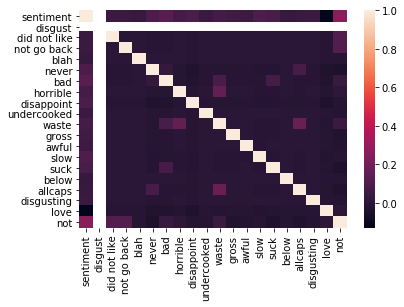

In [35]:
sns.heatmap(df.corr())

In [72]:
data = df[keywords + ['allcaps']]
target = df['sentiment']
np.sum(data)

disgusting        2
did not like      2
not go back       2
blah              1
never            25
bad              17
horrible          6
disappoint       30
undercooked       2
waste             6
gross             4
awful             3
slow             10
suck              8
below             1
love             36
not             132
allcaps           5
dtype: int64

In [37]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


# Instantiate our model and store it in a new variable.
#bnb = BernoulliNB()
bnb = RandomForestClassifier()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 325


In [42]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(target, y_pred, labels=[True, False])
labels=[True, False]
df_confusion = pd.DataFrame(m, index = labels, columns = labels)
df_confusion

,True,False
True,201,299
False,26,474


299 of our 325 errors are due to failing to identify negative sentiments. (Say they are good, but really are bad)
26 of our 325 errors are due to failing to identify positive statements. (Say they are bad, but really are good)
success rate =67.5%

In [43]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.63
Testing on Sample: 0.675


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.7 , 0.59, 0.73, 0.66, 0.66, 0.68, 0.7 , 0.62, 0.68, 0.67])

In [73]:
# play with features 2: add more negative words
keywords = ['disgusting', 'did not like', 'not go back', 'blah', 'never',
            'bad', 'horrible', 'disappoint', 'undercooked', 'waste', 'gross', 'awful', 'slow', 'suck', 'below', 'love', 'not', 'worst', 'problem', 'flop', 'fluke', 'boring', 'impressed']

for key in keywords:
    df[str(key)] = df.review_text.str.contains(str(key), case=False)

df['allcaps'] = df.review_text.str.isupper()

df['sentiment'] = (df['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

data = df[keywords + ['allcaps']]
target = df['sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

m = confusion_matrix(target, y_pred, labels=[True, False])
labels = [True, False]
df_confusion = pd.DataFrame(m, index=labels, columns=labels)
print(df_confusion)

# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

Number of mislabeled points out of a total 1000 points : 312
       True   False
True     219    281
False     31    469
With 20% Holdout: 0.645
Testing on Sample: 0.688


array([0.72, 0.62, 0.74, 0.66, 0.7 , 0.68, 0.7 , 0.65, 0.69, 0.66])

The number of mislabeled points went down! My accuracy is a bit better, but the amount of errors is still high.

In [74]:
# try number 3: added positive words to the keywords list

keywords = ['disgusting', 'did not like', 'not go back', 'blah', 'never',
            'bad', 'horrible', 'disappoint', 'undercooked', 'waste', 'gross', 'awful', 'slow', 'suck', 'below', 'love', 'not', 'worst',
            'problem', 'flop', 'fluke', 'boring', 'impressed', 'great', 'return', 'best']

for key in keywords:
    df[str(key)] = df.review_text.str.contains(str(key), case=False)

df['allcaps'] = df.review_text.str.isupper()

df['sentiment'] = (df['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

data = df[keywords + ['allcaps']]
target = df['sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

m = confusion_matrix(target, y_pred, labels=[True, False])
labels = [True, False]
df_confusion = pd.DataFrame(m, index=labels, columns=labels)
print(df_confusion)

# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

Number of mislabeled points out of a total 1000 points : 308
       True   False
True     471     29
False    279    221
With 20% Holdout: 0.645
Testing on Sample: 0.692


array([0.74, 0.62, 0.73, 0.65, 0.7 , 0.67, 0.7 , 0.66, 0.7 , 0.67])

When I added "good" words into the keywords list, my mislabeled errors went down, but as I look at the confusion matrix, I can see that now a majority of my error is coming from 279/308 times incorrectly identifying a positive sentiment. My success rate is higher but the amount of sentiments I mark as negative is much higher than it should be.

In [50]:
L = len(df)
KFold = 5
fold_idx = np.random.choice(KFold, L)
df['fold_idx'] = fold_idx
for kk in range(KFold):
    df_test = df[df['fold_idx']==kk]
    df_train = df[df['fold_idx'] != kk]
df

,review_text,sentiment,disgust,did not like,not go back,blah,never,bad,horrible,disappoint,...,gross,awful,slow,suck,below,allcaps,disgusting,love,not,fold_idx
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,3
1,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
5,Now I am getting angry and I want my damn pho.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
6,Honeslty it didn't taste THAT fresh.),True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
7,The potatoes were like rubber and you could te...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
8,The fries were great too.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
9,A great touch.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


# Try same classifier for IMDB data set

In [57]:
df = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)
df.columns = ['review_text', 'sentiment']

In [58]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review_text.str.contains(str(key), case=False)


df['sentiment'] = (df['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.
df['allcaps'] = df.review_text.str.isupper()

data = df[keywords + ['allcaps']]
target = df['sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

m = confusion_matrix(target, y_pred, labels=[True, False])
labels=[True, False]
df_confusion = pd.DataFrame(m, index = labels, columns = labels)
df_confusion

Number of mislabeled points out of a total 748 points : 259


,True,False
True,128,234
False,25,361


234 out of 259 errors are due to failing to identify negative sentiments.
 25 out of 259 errors are due to failing to identify positive sentiments.
 65.37% success rate

In [60]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.6
Testing on Sample: 0.6537433155080213


array([0.69736842, 0.60526316, 0.6       , 0.68      , 0.68      ,
       0.65333333, 0.63513514, 0.64864865, 0.52702703, 0.71621622])

# Try classifier on Amazon cells reviews

In [61]:
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
df.columns = ['review_text', 'sentiment']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review_text.str.contains(str(key), case=False)

df['allcaps'] = df.review_text.str.isupper()

df['sentiment'] = (df['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

data = df[keywords + ['allcaps']]
target = df['sentiment']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

m = confusion_matrix(target, y_pred, labels=[True, False])
labels=[True, False]
df_confusion = pd.DataFrame(m, index = labels, columns = labels)
df_confusion

Number of mislabeled points out of a total 1000 points : 344


,True,False
True,183,317
False,27,473


317 of the 344 errors are due to failing to identify negative sentiments
27 of the 344 errors are due to failing to identify positive sentiments
65.6% success rate

In [62]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.685
Testing on Sample: 0.656


array([0.63, 0.68, 0.67, 0.69, 0.72, 0.55, 0.63, 0.63, 0.66, 0.64])